# ON Model - Template Project

Remember to first run the example simulation before an execution of this notebook =)

This notebook shows in addition to the on_model.ipynb how to load the data and how to use a raw_transformer to manipulate the data before the generation of a pytorch dataset.

In [1]:
import numpy as np
import pandas as pd

from pystatplottools.pdf_env.loading_figure_mode import loading_figure_mode
fma, plt = loading_figure_mode(develop=True) # develop=False will export the generated figures as pngs into "./data/RectangleData"
plt.style.use('seaborn-dark-palette')

if 'root_dir' not in locals():
    # Navigate to examples/TemplateProject directory as simulation root directory
    import os
    os.chdir("../examples/TemplateProject")
    root_dir = os.getcwd()

# To be able to compute custom measures
import sys
sys.path.append("./../../python_scripts")
    
mcmc_model_dir = "ONModelMetropolis/"
mcmc_data_dir = root_dir + "/data/" + mcmc_model_dir
mcmc_results_dir = root_dir + "/results/" + mcmc_model_dir

data_dir = root_dir + "/data/" + mcmc_model_dir
results_dir = root_dir + "/results/" + mcmc_model_dir

## MCMC Results

### Expectation Values

In [2]:
from mcmctools.modes.expectation_value import load_expectation_value_results
expectation_values = load_expectation_value_results(files_dir="ONModelMetropolis")
# Insert Kappa as column (as floating number)
expectation_values.insert(0, "Kappa", expectation_values.index.values.astype(np.float))
expectation_values = expectation_values.sort_values("Kappa")
expectation_values

Quantity   Kappa    ExpVal     Error    ExpVal                                \
Observable          Energy    Energy      Mean                                 
Element                                      0         1         2         3   
kappa                                                                          
-1.000000   -1.0 -3.320665  0.002426 -0.000924  0.000129 -0.001466 -0.000425   
-0.900000   -0.9 -2.345973  0.002378  0.000343  0.000365  0.000156 -0.001040   
-0.800000   -0.8 -1.464395  0.002584 -0.000537 -0.000263 -0.001314  0.000285   
-0.700000   -0.7 -0.649390  0.002526 -0.000537 -0.001123  0.001124  0.000401   
-0.600000   -0.6  0.084547  0.002403  0.000905  0.000778 -0.000623 -0.000857   
-0.500000   -0.5  0.687783  0.002281 -0.000848  0.002424  0.000267  0.001595   
-0.400000   -0.4  1.057242  0.001830  0.000045 -0.000501  0.000793 -0.001969   
-0.300000   -0.3  1.261664  0.001578  0.000378 -0.000244 -0.001207  0.000130   
-0.200000   -0.2  1.367859  0.001633  0.001005 -0.001107  0.001403 -0.000148   
-0.100000   -0.1  1.416905  0.001619  0.001561 -0.003536 -0.000483 -0.003322   
0.000000     0.0  1.436425  0.001506 -0.003283 -0.001235 -0.001131 -0.000602   
0.100000     0.1  1.413064  0.001438 -0.003786  0.000038 -0.001807  0.000589   
0.200000     0.2  1.367876  0.001592  0.002972  0.002547  0.002538  0.001047   
0.300000     0.3  1.253281  0.001656 -0.001889 -0.000650 -0.002728  0.001627   
0.400000     0.4  1.065668  0.001852 -0.003761 -0.004757  0.003226 -0.003164   
0.500000     0.5  0.689741  0.002183  0.002383 -0.004582 -0.016406 -0.024734   
0.600000     0.6  0.088010  0.002546 -0.027390 -0.010404 -0.069137  0.008862   
0.700000     0.7 -0.644743  0.002539 -0.046535 -0.019366 -0.001581  0.012199   
0.800000     0.8 -1.463417  0.002502  0.037221 -0.060319 -0.011976  0.054019   
0.900000     0.9 -2.351390  0.002399 -0.068679 -0.199062 -0.030804  0.088750   
1.000000     1.0 -3.311709  0.002659 -0.182318  0.146589 -0.132391  0.058417   

Quantity       Error                                     ExpVal        Error  \
Observable      Mean                               SecondMoment SecondMoment   
Element            0         1         2         3                             
kappa                                                                          
-1.000000   0.000410  0.000422  0.000391  0.000396     2.441931     0.001290   
-0.900000   0.000415  0.000432  0.000453  0.000421     2.233097     0.001147   
-0.800000   0.000474  0.000447  0.000481  0.000475     2.024565     0.001292   
-0.700000   0.000519  0.000482  0.000541  0.000465     1.815088     0.001251   
-0.600000   0.000537  0.000542  0.000478  0.000514     1.600345     0.001168   
-0.500000   0.000632  0.000630  0.000580  0.000631     1.408068     0.001192   
-0.400000   0.000694  0.000634  0.000630  0.000668     1.269832     0.000989   
-0.300000   0.000729  0.000734  0.000729  0.000739     1.201598     0.000824   
-0.200000   0.000701  0.000768  0.000779  0.000805     1.163470     0.001011   
-0.100000   0.000833  0.000839  0.000854  0.000845     1.140801     0.000905   
0.000000    0.000890  0.000875  0.001007  0.000909     1.135286     0.000922   
0.100000    0.001018  0.001058  0.001140  0.001058     1.138531     0.000912   
0.200000    0.001264  0.001203  0.001213  0.001200     1.162116     0.000979   
0.300000    0.001439  0.001388  0.001428  0.001527     1.199351     0.001020   
0.400000    0.001949  0.001987  0.002281  0.001861     1.276132     0.001119   
0.500000    0.002412  0.002489  0.002325  0.002495     1.407032     0.001224   
0.600000    0.003153  0.002889  0.003354  0.003280     1.601476     0.001335   
0.700000    0.003638  0.003843  0.004081  0.003337     1.813601     0.001270   
0.800000    0.004970  0.004126  0.003901  0.004008     2.026100     0.001298   
0.900000    0.004474  0.004418  0.004624  0.005135     2.228482     0.001178   
1.000000    0.004923  0.004741  0.005113  0.005062     2.441712     0.001224   

In [3]:
# Computation of the total mean and of the two point correlator
total_mean = expectation_values.loc[:, ("ExpVal", "Mean", slice(None))].values.mean(axis=1)
mean = expectation_values.loc[:, ("ExpVal", "Mean", slice(None))].values
two_point_correlator = expectation_values["ExpVal", "TwoPointCorrelation", ""].values - np.power(mean, 2.0).sum(axis=1)

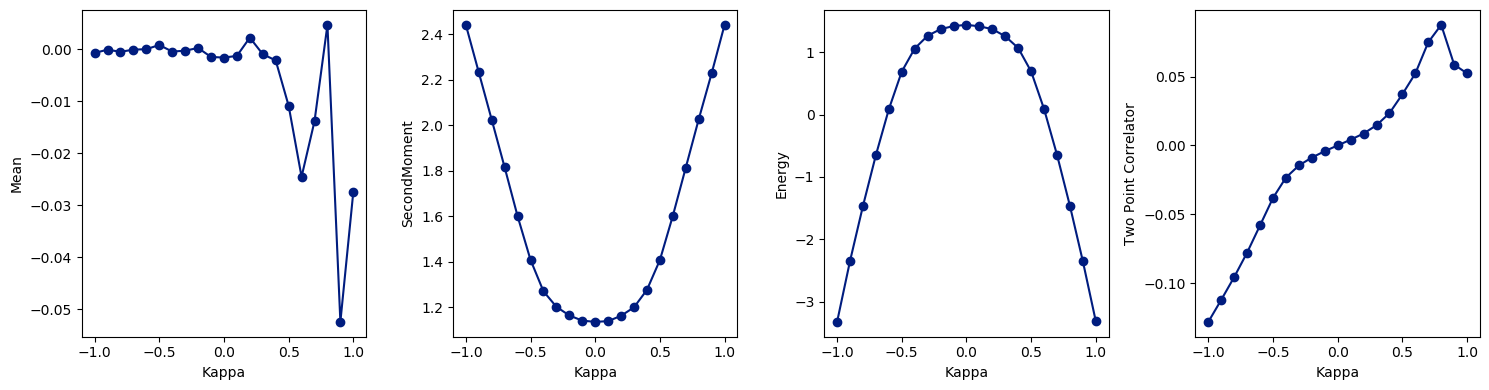

In [4]:
fig, axes = fma.newfig(1.4, ncols=4, figsize=(15, 4))

axes[0].plot(expectation_values["Kappa"], total_mean, "o-")
axes[0].set_xlabel("Kappa")
axes[0].set_ylabel("Mean")

axes[1].plot(expectation_values["Kappa"], expectation_values["ExpVal", "SecondMoment", ""], "o-")
axes[1].set_xlabel("Kappa")
axes[1].set_ylabel("SecondMoment")

axes[2].plot(expectation_values["Kappa"], expectation_values["ExpVal", "Energy", ""], "o-")
axes[2].set_xlabel("Kappa")
axes[2].set_ylabel("Energy")

axes[3].plot(expectation_values["Kappa"], two_point_correlator, "o-")
axes[3].set_xlabel("Kappa")
axes[3].set_ylabel("Two Point Correlator")


plt.tight_layout()

fma.savefig(results_dir, "expectation_values")

## Configurations as Pytorch Dataset

We show how the mcmc configurations can be stored and loaded as a .pt file.

(See also python_scripts/loading_configurations.py and python_scripts/pytorch_data_generation.py)

### Preparation

In [5]:
data_generator_args = {
    # ConfigDataGenerator Args
    "data_type": "target_param", # Parameters as target. In contrast, target_config has configs as target
    # Use energy and two point correlation as target - since the two_point_correlation is a post_measure
    # it needs to be computed when the data is loaded. This is done by defining transform=True
    "labels": [["Kappa", "", ""], ["Energy", "", ""], ["TwoPointCorrelation", "", ""]], # (default is the running_parameter)  
    # Args for ConfigurationLoader
    "path": mcmc_data_dir,
    "total_number_of_data_per_file": 10000,
    "identifier": "expectation_value",
    "running_parameter": "kappa",
    "transform": True, # Indicates that there exists a raw_transformer.py file with a transformer function in
    # the "path" + raw/ directory. The path of the raw_transformer.py file can be adpated with the parameter "transformer_path"
    "chunksize": 100  # If no chunksize is given, all data is loaded at once
}

# Prepare in memory dataset
from pystatplottools.pytorch_data_generation.data_generation.datagenerationroutines import prepare_in_memory_dataset
from mcmctools.pytorch.data_generation.datagenerationroutines import data_generator_factory

prepare_in_memory_dataset(
    root=data_dir,
    batch_size=89,
    data_generator_args=data_generator_args,
    data_generator_name="BatchConfigDataGenerator",
    data_generator_factory=data_generator_factory
)

Random seed is set by np.random.seed()
Write new data_config into file - Data will be generated based on the new data_config file


### Generating and Loading the Dataset

In [6]:
# Load in memory dataset
from pystatplottools.pytorch_data_generation.data_generation.datagenerationroutines import load_in_memory_dataset

# The dataset is generated and stored as a .pt file in the data_dir/data directory the first time this function is called. Otherwise the .pt is loaded.
data_loader = load_in_memory_dataset(
    root=data_dir, batch_size=128, data_generator_factory=data_generator_factory, slices=None, shuffle=True,
    num_workers=0, rebuild=False
    # sample_data_generator_name="ConfigDataGenerator"  # optional: for a generation of new samples
)

# Load training data
for batch_idx, batch in enumerate(data_loader):
    data, target = batch
    # print(batch_idx, len(data))

Processing...
Random seed is set by np.random.seed()
Done!


In [7]:
("Kappa", target[0][0].item()), ("Energy", target[0][1].item()), ("TwoPointCorrelation", target[0][2].item())

(('Kappa', -0.5),
 ('Energy', 0.637526),
 ('TwoPointCorrelation', -0.09539228355076072))

### Inspection of the Dataset - Sample Visualization

In [8]:
from pystatplottools.visualization import sample_visualization

config_dim = (8, 8)  # Dimension of the data
num_std=1

# Random samples
config, label = data_loader.dataset.get_random_sample()
batch, batch_label = data_loader.dataset.get_random_batch(108)

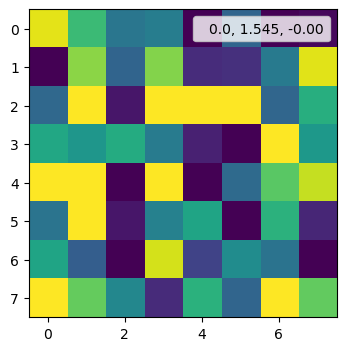

In [9]:
# Single Sample
sample_visualization.fd_im_single_sample(sample=config, label=label, config_dim=config_dim, num_std=num_std,
                                         fma=fma, filename="single_sample", directory=results_dir, figsize=(10, 4));

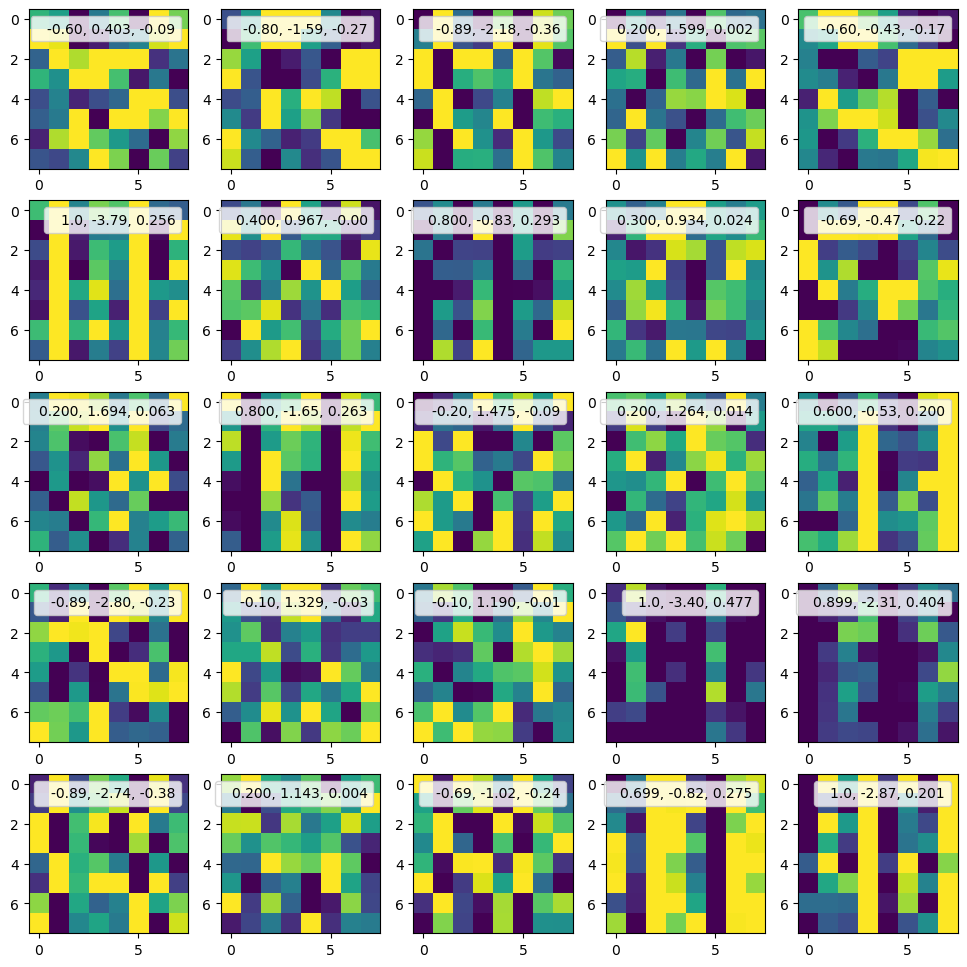

In [10]:
# Batch with labels
sample_visualization.fd_im_batch(batch, batch_labels=batch_label, num_samples=25, dim=(5, 5),
                                 config_dim=config_dim, num_std=num_std,
                                 fma=fma, filename="batch", directory=results_dir, width=2.3, ratio=1.0, figsize=(12, 12));

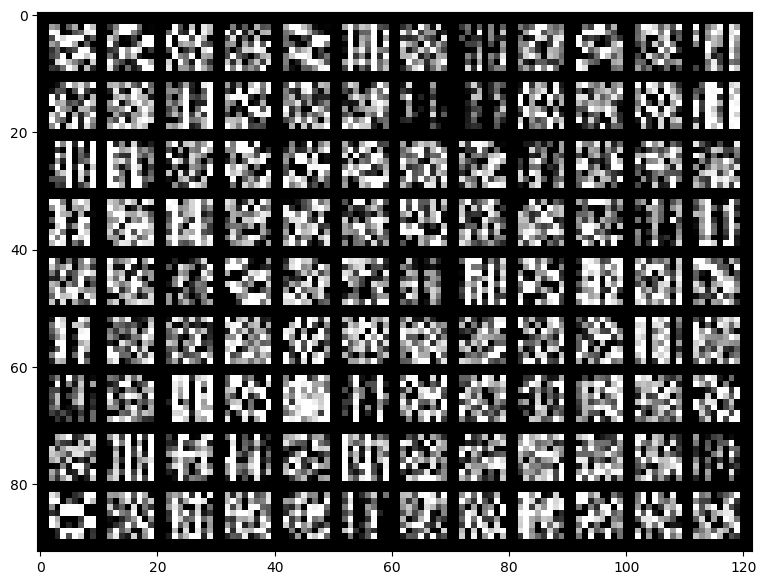

In [11]:
# Batch grid
sample_visualization.fd_im_batch_grid(batch, config_dim=config_dim, num_std=num_std,
                                      fma=fma, filename="batch_grid", directory=results_dir);

### Loading the Data without Pytorch

In [12]:
# Load all data
from mcmctools.loading.loading import load_data

# skipcols=[] Can be used to load only certain columns of the different files
data, filenames = load_data(files_dir=mcmc_model_dir, running_parameter="kappa",
                            identifier="expectation_value")  # , skipcols=["Config"])
from mcmctools.utils.json import load_configs
sim_params, execution_params, running_parameter = load_configs(
    files_dir="ONModelMetropolis", mode="expectation_value", project_base_dir="./")

data

quantity                Energy SecondMoment Kappa    Config            \
elem                                                      0             
component                                                 0         1   
kappa     sample_num                                                    
-0.100000 0           1.358844     1.113913  -0.1  0.182185 -0.225422   
          1           1.452126     1.243508  -0.1  0.457087 -0.386492   
          2           1.396303     1.187336  -0.1 -0.483102  0.832725   
          3           1.525367     1.075052  -0.1 -0.711888  0.092310   
          4           1.119266     0.932742  -0.1 -0.395284  0.835088   
...                        ...          ...   ...       ...       ...   
1.000000  9995       -3.439124     2.509969   1.0  1.166196  0.678156   
          9996       -3.695267     2.424854   1.0  1.166196  0.678156   
          9997       -3.483497     2.459773   1.0  1.041065  0.313728   
          9998       -3.280968     2.247767   1.0  0.907545  0.741273   
          9999       -3.489254     2.239688   1.0  0.783370  0.293194   

quantity                                                                ...  \
elem                                             1                      ...   
component                    2         3         0         1         2  ...   
kappa     sample_num                                                    ...   
-0.100000 0          -0.146771  0.617139 -0.833291 -0.395404 -0.276727  ...   
          1          -0.981206 -0.541359 -0.867138 -0.818901  0.295098  ...   
          2          -0.340307  0.230197 -0.354923 -0.102673  0.533744  ...   
          3           0.015697 -0.112733  0.165847  0.223563 -0.471123  ...   
          4          -0.014243 -0.425343 -1.005526 -0.393357  0.026720  ...   
...                        ...       ...       ...       ...       ...  ...   
1.000000  9995        0.809107  0.638308  1.141330  1.010471  0.593690  ...   
          9996        0.809107  0.638308  1.092022  0.210704  0.545904  ...   
          9997        0.477637  0.540576  0.647096  0.590864  0.465241  ...   
          9998        0.413708  0.671456  1.243214 -0.197451  0.059582  ...   
          9999        0.293096  0.407100  1.226533  0.680713 -0.394572  ...   

quantity                                                                \
elem                        14                  15                       
component                    2         3         0         1         2   
kappa     sample_num                                                     
-0.100000 0           0.293979  0.700223  0.574163  0.728140  0.145997   
          1           0.293979  0.700223 -0.733308 -0.050712  0.611496   
          2           0.203339  0.979458  0.436521 -0.372971 -0.435665   
          3           0.437597 -0.102397  0.827450  0.443512 -0.334321   
          4           0.210661  0.561523  0.280035 -0.357900  0.406606   
...                        ...       ...       ...       ...       ...   
1.000000  9995        0.660859  0.120169  0.945730  0.807881  0.694853   
          9996        0.660859  0.120169  0.889127  0.857309  0.848742   
          9997        0.136962  1.062428  1.127864  0.246963  0.556372   
          9998        0.545925  0.355895  0.515511  0.982539  0.728958   
          9999        0.534690 -0.068172  0.786897  1.089030  0.152634   

quantity                            Mean                                
elem                                                                    
component                    3         0         1         2         3  
kappa     sample_num                                                    
-0.100000 0           0.002982 -0.090896 -0.006527 -0.051610  0.091036  
          1          -0.706669  0.009213  0.025622 -0.043549 -0.287223  
          2          -1.139324  0.115694  0.252911  0.039849 -0.079653  
          3          -0.212537  0.058472  0.196544 -0.206438 -0.159944  
          4           0